In [1]:
# -*- coding: UTF-8 -*-
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import re
import random
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('./data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
### PATH ###
# pwd '/kaggle/working'
train_path = './data/train/'
test_path = './data/test/'
dis_path = './data/distance.csv'

In [2]:
### 读取样本文件
train_df = pd.read_csv(train_path+'5.csv', header=None).fillna(0)
train_df.head()
train_df.info()

### dataframe to array
train = train_df.values
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Columns: 228 entries, 0 to 227
dtypes: float64(228)
memory usage: 513.1 KB


(288, 228)

In [3]:
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/usr/share/fonts/myfonts/SIMSUN.TTC", size=12)

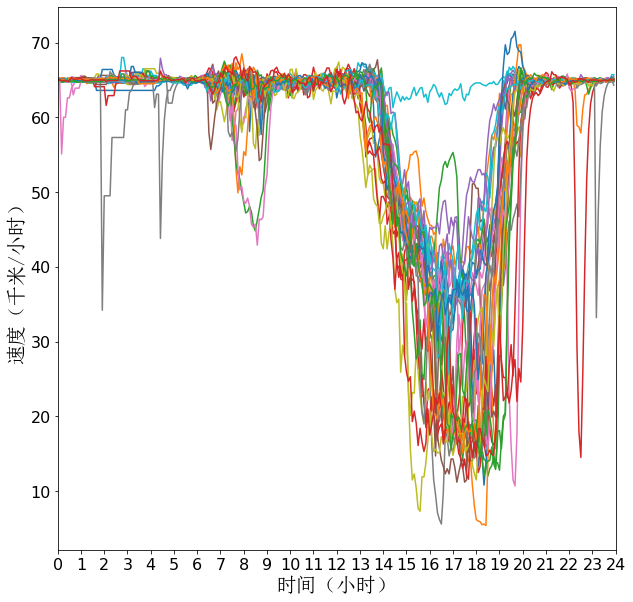

In [4]:
# -*- coding: UTF-8 -*-
### 读取样本文件
k = 100
for i in range(34):
    #train_df = pd.read_csv(train_path+'5.csv', header=None).fillna(0)
    train_df = pd.read_csv(train_path+str(i)+'.csv', header=None).fillna(0)
    #train_df.head()
    #train_df.info()

    ### dataframe to array
    train = train_df.values
    #train.shape
    ### One sample visualization

    times = [r*5/60 for r in range(288)]

    fig = plt.figure(1,figsize=[10,10])
    
    # 设置刻度字体大小
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('速度（千米/小时）',fontproperties=font_set, fontsize=20)
    plt.xlabel('时间（小时）',fontproperties=font_set, fontsize=20)
    cm = plt.cm.get_cmap('RdYlBu')
    plt.plot(times,train[:, k-1])

    x_major_locator=MultipleLocator(1)
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(0,24)
    #plt.legend()
    
plt.savefig("../../Writing/traffic_prediction/fig/daily_%s.jpg"%k)
plt.show()

(34, 288, 228)
(288, 228)


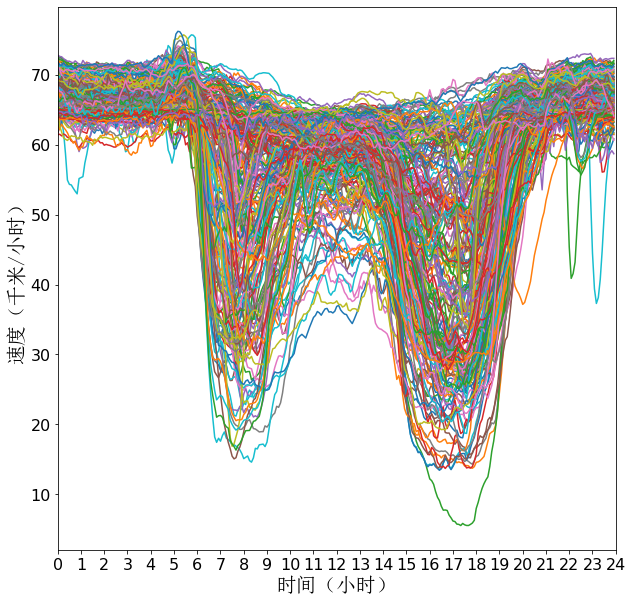

In [5]:
### 读取全部文件
num_train_file = 34
total_tr = []
for i in range(num_train_file):
    tr_df = pd.read_csv(train_path+'%s.csv'%i, header=None).fillna(0)
    tr_df.head()

    ### dataframe to array
    tr = tr_df.values
    total_tr.append(tr)

total_tr = np.array(total_tr)
print(total_tr.shape)

### 每个sensor对工作日平均
ave_tr = np.mean(total_tr, axis=0)
print(ave_tr.shape)

### Total sample visualization

times = [r*5/60 for r in range(288)]

fig = plt.figure(1,figsize=[10,10])
# 设置刻度字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('速度（千米/小时）',fontproperties=font_set, fontsize=20)
plt.xlabel('时间（小时）',fontproperties=font_set, fontsize=20)
#plt.title('Speed variation')

for k in range(ave_tr.shape[1]):
    plt.plot(times,ave_tr[:,k])

x_major_locator=MultipleLocator(1)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,24)

#plt.legend()

plt.savefig("../../Writing/traffic_prediction/fig/daily_avg.jpg")
plt.show()

### Markdown

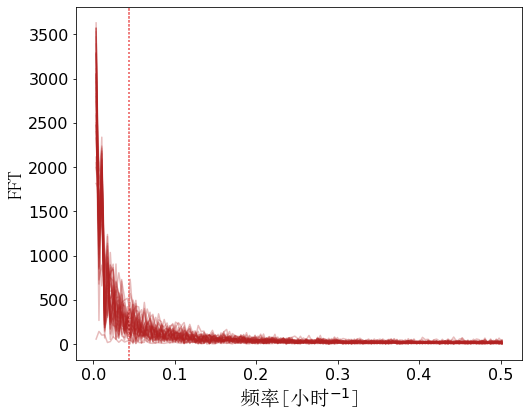

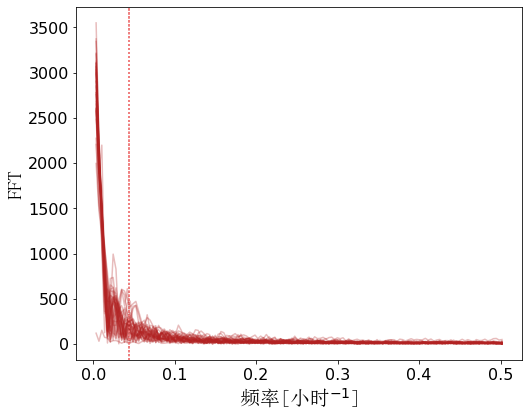

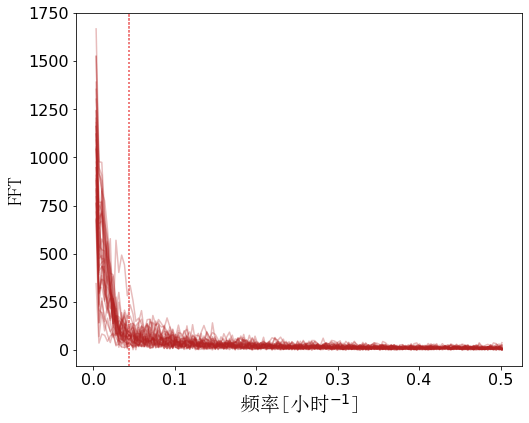

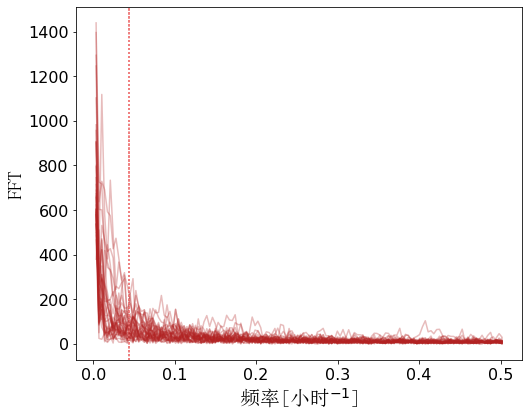

In [6]:
from scipy.fftpack import fft

def plot_with_fft(k):
    for i in range(34):
#         for j in range(24):
            #train_df = pd.read_csv(train_path+'5.csv', header=None).fillna(0)
        train_df = pd.read_csv(train_path+str(i)+'.csv', header=None).fillna(0)
        #train_df.head()
        #train_df.info()

        ### dataframe to array
        train = train_df.values

#         fig = plt.figure(1,figsize=[8,6.5])
#         # 设置刻度字体大小
#         plt.xticks(fontsize=16)
#         plt.yticks(fontsize=16)
        ts = times
#         plt.ylabel('速度（千米/小时）',fontproperties=font_set, fontsize=20)
#         plt.xlabel('时间（小时）',fontproperties=font_set, fontsize=20)
        #plt.title('时序变化',fontproperties=font_set, fontsize=22)
        #plt.plot(ts,train[:,k])

        fig = plt.figure(2,figsize=[8,6.5])
        fft_complex = fft(train[:,k])
        fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
        fft_xvals = [t / ts[-1] for t in ts]
        npts = len(fft_xvals) // 2 + 1
        fft_mag = fft_mag[:npts]
        fft_xvals = fft_xvals[:npts]

        # 设置刻度字体大小
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        #plt.xlim(0,1/23)
        plt.ylabel('FFT',fontproperties=font_set, fontsize=20)
        plt.xlabel('频率[小时$^{-1}$]',fontproperties=font_set, fontsize=20)
        #plt.title('傅里叶变换',fontproperties=font_set, fontsize=22)
        plt.plot(fft_xvals[1:],fft_mag[1:], color='firebrick', alpha=0.3)
        # Draw lines at 1, 1/2, and 1/3 week periods
        plt.axvline(x=1./23, linestyle="dotted",color='lightcoral',alpha=0.3)
#         plt.axvline(x=11./23,color='red',alpha=0.3)
#         plt.axvline(x=17./23,color='red',alpha=0.3)
    plt.savefig("../../Writing/traffic_prediction/fig/FFT_%s.jpg"%k)
    plt.show()

for k in [30,60,100,135]:
    plot_with_fft(k)

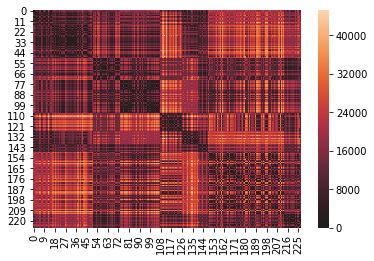

In [7]:
import seaborn as sns
dis_df = pd.read_csv(dis_path, header=None)
dis_df.head()
heatmap_plot=sns.heatmap(dis_df, center=0) #, cmap='gist_ncar')
plt.savefig("../../Writing/traffic_prediction/fig/distance.jpg")

In [8]:
# 层次聚类
from sklearn.cluster import AgglomerativeClustering
dis = dis_df.values
num_cls = 6
clustering = AgglomerativeClustering(n_clusters=num_cls, affinity='precomputed',linkage='complete')
c_results = clustering.fit_predict(dis)

print(c_results)
cls_index = [i for i,a in enumerate(c_results) if a == 5]
print(cls_index)

[5 0 0 0 0 3 3 5 0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 0 3 3 3 0 0 0 0 0 0 3 0 0 0
 3 0 3 0 3 3 0 0 0 0 3 3 3 0 4 4 1 4 1 1 4 4 4 4 4 1 3 4 4 4 3 4 3 1 1 4 1
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 2
 2 2 2 2 5 2 2 2 2 5 2 2 5 5 2 5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 4 0
 4 1 3 3 3 1 3 1 2 3 1 2 3 2 1 1 1 3 1 2 3 1 1 1 1 2 1 1 2 1 1 2 2 3 3 2 3
 2 1 1 2 3 2 2 2 2 3 1 3 1 2 2 1 3 3 1 1 1 1 1 1 2 3 2 1 2 4 4 5 4 1 4 4 4
 4 1 4 1 1 4]
[0, 7, 108, 109, 115, 120, 123, 124, 126, 129, 216]


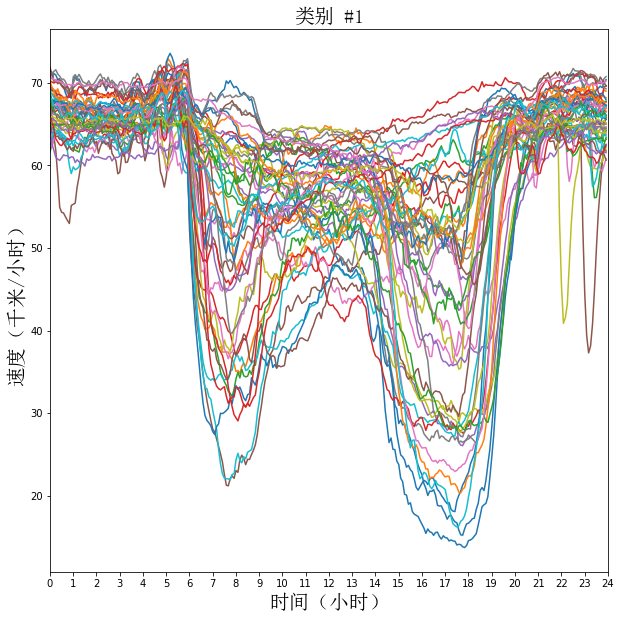

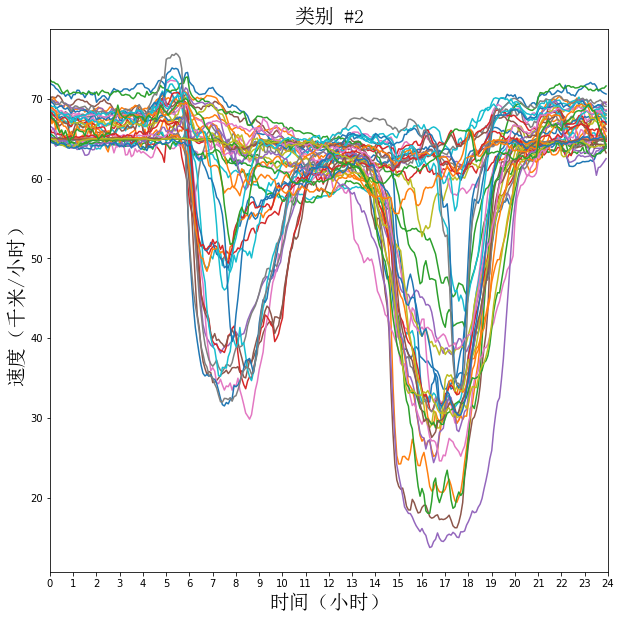

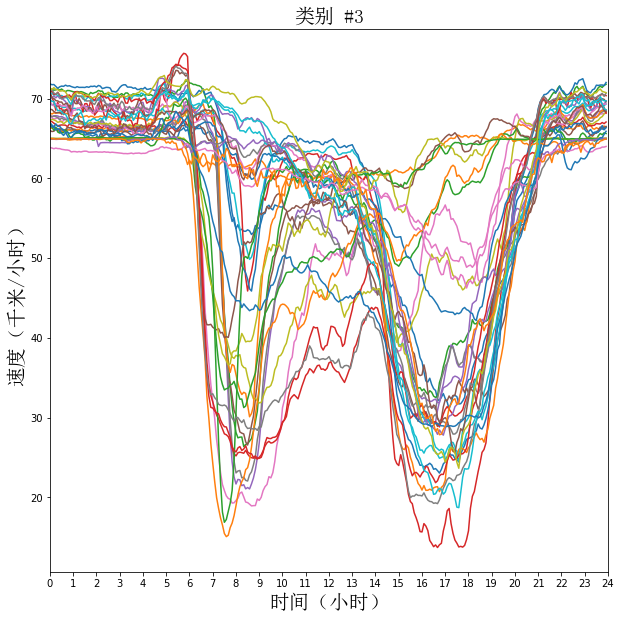

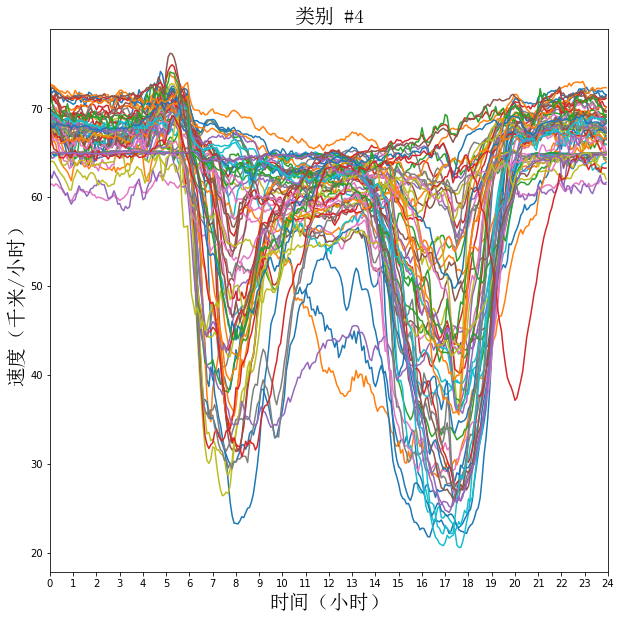

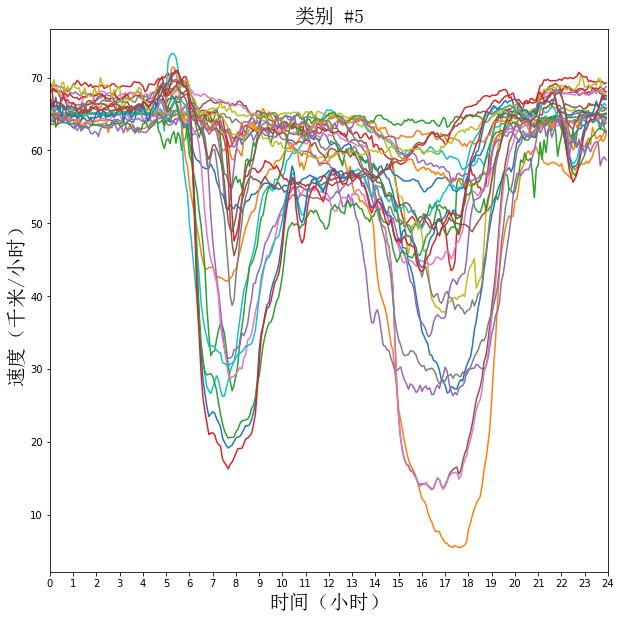

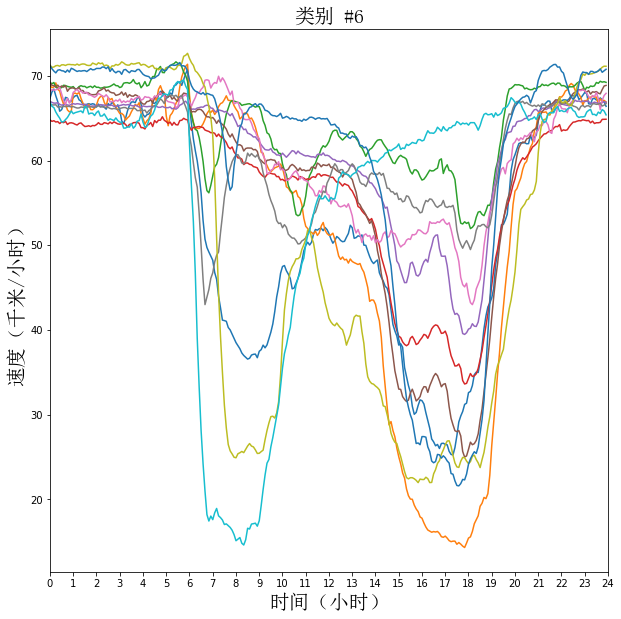

In [9]:
### Clustered sample visualization


for c in range(num_cls):
    fig = plt.figure(1,figsize=[10,10])
    times = [r*5/60 for r in range(288)]
    plt.ylabel('速度（千米/小时）',fontproperties=font_set, fontsize=20)
    plt.xlabel('时间（小时）',fontproperties=font_set, fontsize=20)
    plt.title('类别 #%s'%(c+1),fontproperties=font_set, fontsize=20)
    
    cls_index = [i for i,a in enumerate(c_results) if a == c]
    
    for ci in cls_index:
        plt.plot(times,ave_tr[:,ci])

    x_major_locator=MultipleLocator(1)
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(0,24)
    plt.savefig("../../Writing/traffic_prediction/fig/cls_%s.jpg"%(c+1))
    #plt.legend()
    plt.show()

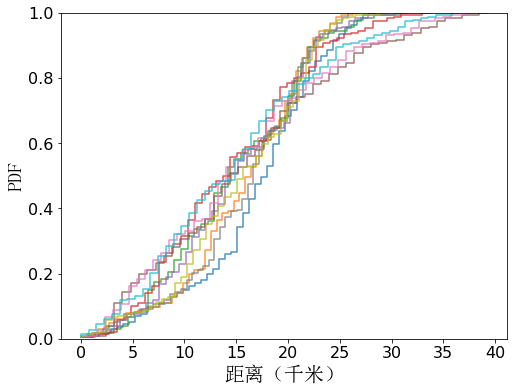

In [21]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

for i in range(10):
    fig = plt.figure(1,figsize=[8,6])
    ecdf = sm.distributions.ECDF(dis[i])

    #等差数列，用于绘制X轴数据
    x = np.linspace(min(dis[i])/1000, max(dis[i])/1000)
    # x轴数据上值对应的累计密度概率
    y = ecdf(x*1000)
    #绘制阶梯图
    plt.step(x, y, alpha=0.8)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim((0.0,1.0))
    plt.ylabel('PDF',fontproperties=font_set, fontsize=20)
    plt.xlabel('距离（千米）',fontproperties=font_set, fontsize=20)
    plt.savefig("../../Writing/traffic_prediction/fig/pdf.jpg")
plt.show()

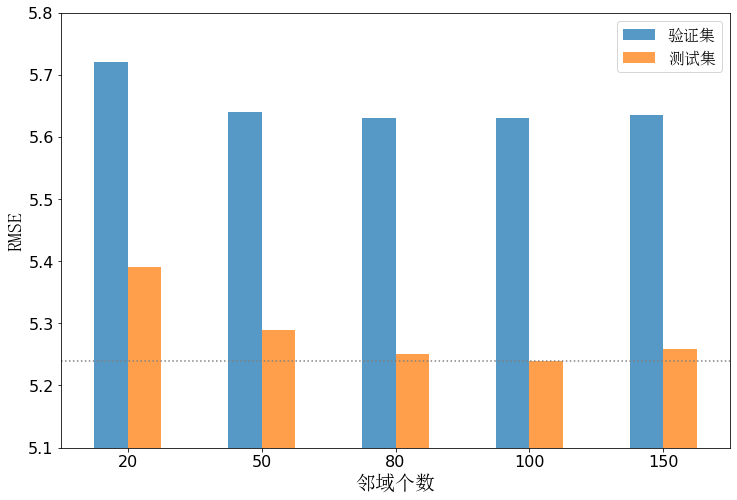

In [20]:

'''
除了使用matplotlib创建标准统计图，还可以使用panda来创建其他类型的统计图
本例实现：利用panda创建一个条形图和箱线图，并将它们并排放置
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/usr/share/fonts/myfonts/SIMSUN.TTC", size=16)
#plt.style.use('ggplot')
#创建一个基础图和两个子图
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=[12,8])
#使用ravel()函数将两个子图分别赋给两个变量ax1和ax2，这样可以避免是使用行和列的索引
ax1 = axes#.ravel()
k = [[5.72,5.39],[5.64,5.29],[5.63,5.25],[5.63,5.24],[5.635,5.258]]
k = np.array(k)
data_frame = pd.DataFrame(k,index=['20','50','80','100','150'],
                          columns=pd.Index(['验证集','测试集'],name='Metric'))
#创建条形图并设置相关属性

data_frame.plot(kind='bar',ax=ax1,alpha=0.75)
plt.legend(prop=font_set,fontsize=20)
plt.setp(ax1.get_xticklabels(),rotation=0,fontsize=10)
plt.setp(ax1.get_yticklabels(),rotation=0,fontsize=10)
ax1.set_xlabel('邻域个数',fontproperties=font_set, fontsize=20)
ax1.set_ylabel('RMSE',fontproperties=font_set, fontsize=20)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim((5.1,5.8))
plt.axhline(y=5.24, linestyle="dotted",color='gray')
#创建箱线图并设置相关属性
# colors = dict(boxes='DarkBlue',whiskers='Gray',medians='Red',caps='Black')
# data_frame.plot(kind='box',color=colors,sym='r.',ax=ax2,title='Box Plot')
# plt.setp(ax2.get_xticklabels(),rotation=45,fontsize=10)
# plt.setp(ax2.get_yticklabels(),rotation=0,fontsize=10)
# ax2.set_xlabel('Metric')
# ax2.set_ylabel('Value')
# ax2.xaxis.set_ticks_position('bottom')
# ax2.yaxis.set_ticks_position('left')
plt.savefig("../../Writing/traffic_prediction/fig/k0.jpg")
plt.show()